# Lab 3a: Graphs I

Lab associated with Module 3a: Graphs I

***

In [2]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [3]:
import numpy as np
import sys
from termcolor import colored, cprint




In [4]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

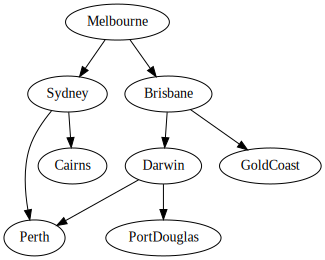

In [5]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [6]:
class Node:
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        self.colour = "black" #works with black
        self.level = 0
        self.flag = 0
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False


    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [7]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [8]:
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [9]:
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [10]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [11]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [12]:
V = G.vertices

In [13]:
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [14]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

In [15]:
print(G)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [24]:
def DFS(root):
    
    if root == None: # changed to None instead of Null
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)

In [17]:
def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
        
def DFS(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)

In [18]:
# Let us do the DFS from Melbourne
w = G.vertices[0]

DFS(w, G)

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


***

### <font color='red'> Section 3: Implement Topological Sorting, as we discussed in the lecture. Do not forget to test your program on the dependency graph given in the lecture. </font>

In [19]:
#### TODO ####
### Good Luck ###

## Preorder

def TopologicalSORT(w, G):
  stack = []

  for vertex in G.vertices:
    vertex.status = "unvisited"
  
  DfsChecker(w, stack)
  return stack
  

def DfsChecker(currentNode, stack):
  currentNode.status = "inprogress"
  for vertex in currentNode.getOutNeighbors():
    if vertex.status == "unvisited":
      DfsChecker(vertex, stack)
  stack.append(currentNode.value)
  currentNode.status = "done"


In [20]:
a = G.vertices[2]
TopologicalSORT(a, G)

['Perth', 'PortDouglas', 'Darwin', 'GoldCoast', 'Brisbane']

In [21]:
b = G.vertices[4]
TopologicalSORT(b, G)

['Perth', 'PortDouglas', 'Darwin']

***

### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph

In [32]:
# def BFS(root):

#     visited = [False] * (num_nodes_in_graph)

#     # Create a queue for BFS
#     queue = []

#     queue.append(root)
#     visited[root] = True

#     while queue:

#         r = queue.pop(0)
#         print(r)

#         for n in r.adjacent:
            
#             if visited[n] == False:
                
#                 visited[n] = True
#                 queue.append(n)
                

In [36]:
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            print(u)
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)


In [37]:
# Let us do the BFS from Melbourne
BFS(G.vertices[0], G)

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
PortDouglas


In [38]:
BFS(G.vertices[4], G)

Darwin
Perth
PortDouglas


***

### <font color='red'> Section 5: Write an algorithm (and code) to determine the distance of a node from a specified node to all other nodes. Note, you are expected to use BFS. Distance will be specified in terms of how how many hops away a node is. </font>

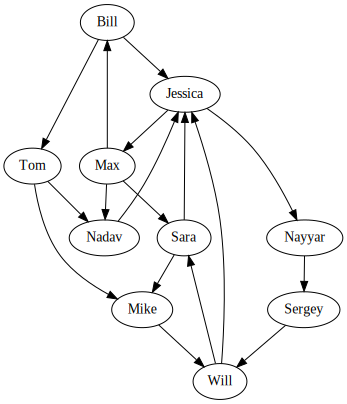

In [39]:
## new graph testing

#adding nodes
T = Graph()

T.addVertex( Node("bill") ) #0
T.addVertex( Node("tom") ) #1
T.addVertex( Node("mike") ) #2
T.addVertex( Node("will") ) #3
T.addVertex( Node("nadav") ) #4
T.addVertex( Node("jessica") ) #5
T.addVertex( Node("nayyar") ) #6
T.addVertex( Node("sergey") ) #7
T.addVertex( Node("max") ) #8
T.addVertex( Node("sara") ) #9




T.addDiEdge(T.vertices[0],T.vertices[1])
T.addDiEdge(T.vertices[0],T.vertices[5])

T.addDiEdge(T.vertices[1],T.vertices[2])
T.addDiEdge(T.vertices[1],T.vertices[4])

T.addDiEdge(T.vertices[2],T.vertices[3])
T.addDiEdge(T.vertices[2],T.vertices[0])

T.addDiEdge(T.vertices[3],T.vertices[9])
T.addDiEdge(T.vertices[3],T.vertices[5])

T.addDiEdge(T.vertices[4],T.vertices[5])

T.addDiEdge(T.vertices[5],T.vertices[8])
T.addDiEdge(T.vertices[5],T.vertices[6])

T.addDiEdge(T.vertices[6],T.vertices[7])

T.addDiEdge(T.vertices[7],T.vertices[3])

T.addDiEdge(T.vertices[8],T.vertices[9])
T.addDiEdge(T.vertices[8],T.vertices[4])

T.addDiEdge(T.vertices[9],T.vertices[2])

w = T.vertices[0]

dot1 = Digraph()


dot1.edge('Bill', 'Jessica')
dot1.edge('Tom', 'Mike')
dot1.edge('Tom', 'Nadav')
dot1.edge('Mike', 'Will')
dot1.edge('Will', 'Sara')
dot1.edge('Will', 'Jessica')
dot1.edge('Nadav', 'Jessica')
dot1.edge('Bill', 'Tom')
dot1.edge('Jessica', 'Max')
dot1.edge('Jessica', 'Nayyar')
dot1.edge('Nayyar', 'Sergey')
dot1.edge('Sergey', 'Will')
dot1.edge('Sara', 'Jessica')

dot1.edge('Max', 'Sara')
dot1.edge('Max', 'Nadav')
dot1.edge('Sara', 'Mike')
dot1.edge('Max', 'Bill')



#dot.view()
dot1

In [40]:
# BiDi search

from inspect import stack


def BiDiBFS(G, To, From):

  for v in G.vertices:
    v.status = "unvisited"

  state = True  # State to alternate search direction
  listA = []    # Path from source
  listB = []    # Path from destination
  stackA = []   # List "to check" - source side
  stackB = []   # List "to check" - destination side

  helperBSF(G, To, From, state, listA, listB, stackA, stackB)


def helperBSF(G, source, destination, state, listA, listB, stackA, stackB):
  
  # End case check if common node found
  if bool(set(listA).intersection(listB)):
    listA.append(source)
    print("Found common node with shorest path: " , source.value)
    Path = listA + listB[::-1]            # Concatenate paths
    print("Path >> ", *Path, sep=", ")    # Prints path in CSV format
    return True
    
  # Traverse from Source
  if state:
    if source == "visited":
      return
    listA.append(source)    # add to travelled list
    # stackA.append(source)   # add to check list
    source.status = "visited"
    if stackA != []:
      stackA.pop(0)
    for child in source.getOutNeighbors():
      if child.status == "unvisited":
        # child.status = "visited"
        stackA.append(child)
    state = not state
    helperBSF(G, stackA[0], destination, state, listA, listB, stackA, stackB)
  
  # Traverse from Source
  else:
    if destination == "visited":
      return
    listB.append(destination)   # add to travelled list
    # stackB.append(destination)  # add to check list
    destination.status = "visited"
    if stackB != []:
      stackB.pop(0)
    for child in destination.getOutNeighbors():
      if child.status == "unvisited":
        # child.status = "visited"
        stackB.append(child)
    state = not state
    helperBSF(G, source, stackB[0], state, listA, listB, stackA, stackB)

  return False # If not found common node



# Perform search on sample graph "T"
BiDiBFS(T, T.vertices[0], T.vertices[7])

Found common node with shorest path:  nadav
Path >> , bill, tom, jessica, mike, nadav, jessica, sara, will, sergey


In [42]:
# #### TODO ####
# ### Good Luck ###


# ##Bidirectional search is used to find the shortest path between a 
# #source and a destination. It operates by essentially running two 
# #simultaneous breadth-first searches one from each node. 
# #When their searches collide, we have a match. Design an algorithm 
# #for bi-directional search, and then code it in this week's ipynb.

    
def BSF_nadav(startNode, endNode, T):
  list1 = nadavHelper(startNode, T)
  list2 = nadavHelper(endNode, T)
  result = commonNodeChecker(list1, list2)
  #print("list 1 " ,list1)
  #print("list 2 " ,list2)
  print("result " ,result[0])
  #print(result[0])






def nadavHelper(startNode, T):  
  stack = []  
  for v in T.vertices:
      v.status = "unvisited"
      
  n = len(T.vertices)
  
  Ls = [ [] for i in range(n) ]
  Ls[0] = [startNode]  # was Ls[0] = [w] # Ls[0] = [startNode] worked
  startNode.status = "visited" # was w.status
  
  for i in range(n):
      for u in Ls[i]:

          stack.append(u.value)
          #print(u)
          
          for v in u.getOutNeighbors():
              
              if v.status == "unvisited":
                  v.status = "visited"
                  Ls[i + 1].append(v)
  return stack







def commonNodeChecker(listA, listB):
  result = []
  for element in listA:
      if element in listB:
          result.append(element)
  return result




***

In [43]:

StartingNodee = T.vertices[2]
endingNodee = T.vertices[9]
BSF_nadav(StartingNodee,endingNodee,T)

result  mike


### <font color='red'> Section 6: Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm. </font>

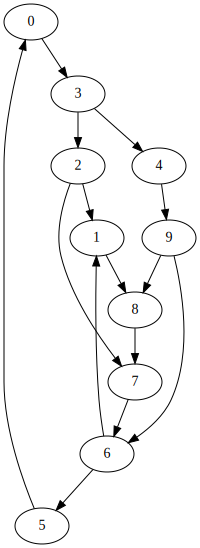

In [51]:
## new graph testing

#adding nodes
Bi = Graph()

Bi.addVertex( Node("zero") ) #0
Bi.addVertex( Node("one") ) #1
Bi.addVertex( Node("two") ) #2
Bi.addVertex( Node("three") ) #3
Bi.addVertex( Node("four") ) #4
Bi.addVertex( Node("five") ) #5
Bi.addVertex( Node("six") ) #6
Bi.addVertex( Node("seven") ) #7
Bi.addVertex( Node("eight") ) #8
Bi.addVertex( Node("nine") ) #9



#add directions from node 0
Bi.addDiEdge(Bi.vertices[0],Bi.vertices[3])
# Comment out to test for IS-BiPartite, 
# Uncomment to test for NOT-BiPartite
Bi.addDiEdge(Bi.vertices[0],Bi.vertices[2]) # for testing false

#add directions from node 1
Bi.addDiEdge(Bi.vertices[1],Bi.vertices[8])
# 
#add directions from node 2
Bi.addDiEdge(Bi.vertices[2],Bi.vertices[1])
Bi.addDiEdge(Bi.vertices[2],Bi.vertices[7])

#add directions from node 3
Bi.addDiEdge(Bi.vertices[3],Bi.vertices[2])
Bi.addDiEdge(Bi.vertices[3],Bi.vertices[4])

#add directions from node 4
Bi.addDiEdge(Bi.vertices[4],Bi.vertices[9])

#add directions from node 5
Bi.addDiEdge(Bi.vertices[5],Bi.vertices[0])

#add directions from node 6
Bi.addDiEdge(Bi.vertices[6],Bi.vertices[1])
Bi.addDiEdge(Bi.vertices[6],Bi.vertices[5])

#add directions from node 7
Bi.addDiEdge(Bi.vertices[7],Bi.vertices[6])

#add directions from node 8
Bi.addDiEdge(Bi.vertices[8],Bi.vertices[7])

#add directions from node 9
Bi.addDiEdge(Bi.vertices[9],Bi.vertices[6])
Bi.addDiEdge(Bi.vertices[9],Bi.vertices[8])




w = Bi.vertices[0]





dotNEW = Digraph()

dotNEW.edge('0', '3')
dotNEW.edge('1', '8')

#dotNEW.edge('0', '2') # for testing false

dotNEW.edge('2', '1')
dotNEW.edge('2', '7')
dotNEW.edge('3', '2')
dotNEW.edge('3', '4')
dotNEW.edge('4', '9')
dotNEW.edge('5', '0')
dotNEW.edge('6', '1')
dotNEW.edge('6', '5')
dotNEW.edge('7', '6')
dotNEW.edge('8', '7')
dotNEW.edge('9', '6')
dotNEW.edge('9', '8')



dotNEW


In [47]:
#### TODO ####
### Good Luck ###



def RB_BiPartite(Start, graph):
  blackList = []
  redList = [] 
  stack = [] 
  for v in graph.vertices:
      v.status = "unvisited"
      
  n = len(graph.vertices)
  Ls = [ [] for i in range(n) ]
  Ls[0] = [Start]                               # was Ls[0] = [w] # Ls[0] = [startNode] worked                                      
  Start.status = "visited"                      # was w.status
  # Start.colour = "black"
  for i in range(n):                            # for each object in given graph
      for u in Ls[i]:                           # for each object in respective level
          u.level = i 
          stack.append(i) 
          for v in u.getOutNeighbors():         # for each neighbor of current object
              if v.status == "unvisited":
                  v.status = "visited"
                  if i % 2 == 0:
                    v.colour = "red"
                  # else:
                  #   v.colour = "black"
                  Ls[i + 1].append(v)
  

  bipartiteCheck = 0
  print("\t    colour \t level \t value \t \tcolour \t level \t value\n")
  for i in range(n):
    for j in Ls[i]:
      for k in j.getOutNeighbors():
        if  j.colour == k.colour:
          bipartiteCheck = 1
        print("comparing: ", j.colour, "\t", j.level, "\t", j.value ,"\t with: ", k.colour,"\t", k.level,"\t", k.value)

  if bipartiteCheck == 1:
    return print("\nNOT a bipartite graph")
  else:
    return print("\nIS a bipartite graph")



In [50]:
testTree = Bi
From = 0
RB_BiPartite(testTree.vertices[From] ,testTree)


	    colour 	 level 	 value 	 	colour 	 level 	 value

comparing:  black 	 0 	 zero 	 with:  red 	 1 	 three
comparing:  black 	 0 	 zero 	 with:  red 	 1 	 two
comparing:  red 	 1 	 three 	 with:  red 	 1 	 two
comparing:  red 	 1 	 three 	 with:  black 	 2 	 Four
comparing:  red 	 1 	 two 	 with:  black 	 2 	 one
comparing:  red 	 1 	 two 	 with:  black 	 2 	 seven
comparing:  black 	 2 	 Four 	 with:  red 	 3 	 nine
comparing:  black 	 2 	 one 	 with:  red 	 3 	 eight
comparing:  black 	 2 	 seven 	 with:  red 	 3 	 six
comparing:  red 	 3 	 nine 	 with:  red 	 3 	 six
comparing:  red 	 3 	 nine 	 with:  red 	 3 	 eight
comparing:  red 	 3 	 eight 	 with:  black 	 2 	 seven
comparing:  red 	 3 	 six 	 with:  black 	 2 	 one
comparing:  red 	 3 	 six 	 with:  black 	 4 	 five
comparing:  black 	 4 	 five 	 with:  black 	 0 	 zero

NOT a biprtite graph


In [ ]:
dotNEW


***

### Section 7: Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [ ]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [52]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [53]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [54]:
def SCC(G, verbose=False):
    
    ordering = []
    
    for v in G.vertices:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in G.vertices:
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, ordering, verbose)
        currentTime += 1
    
    # now reverse all the edges
    E = G.getDirEdges()
    for x,y in E:
        G.reverseEdge(x,y)
   
    # and do it again, but this tim in the order "ordering"
    SCCs = []
    for v in ordering:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in ordering:
        visited = [] 
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, visited, verbose)
            SCCs.append(visited[:])
    
    return SCCs

Let us look at the example that we did in the lecture:

In [55]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)

Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,Berkeley,Puppies,Google,
	 Edges:
	(Stanford,Wikipedia) (Stanford,Puppies) (Wikipedia,Stanford) (Wikipedia,NYTimes) (Wikipedia,Puppies) (NYTimes,Stanford) (NYTimes,Puppies) (Berkeley,Stanford) (Berkeley,Puppies) (Puppies,Google) (Google,Puppies) 



In [57]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

['Berkeley']
['Stanford', 'NYTimes', 'Wikipedia']
['Puppies', 'Google']


Play around with above SCC Code -- Try applying it on the Australian cities data we had before.

***